In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from chart import show, show_collection

import requests
import matplotlib.pyplot as plt
import numpy as np

import cv2
from skimage import io, color

### Gradient

object type: <class 'numpy.ndarray'>
pixel type: uint8
dims: (1274, 800, 3)
size: 2.91595458984375 Mbytes


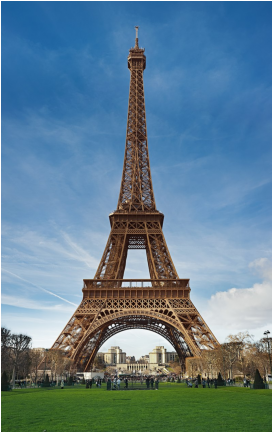

In [8]:
# Load an example image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Eiffel_Tower_Marsfeld_Paris.jpg/800px-Eiffel_Tower_Marsfeld_Paris.jpg"
image = io.imread(image_url)

show(image, cmap="gray", scale=0.07)
print(f"object type: {type(image)}")
print(f"pixel type: {image.dtype}")
print(f"dims: {image.shape}")
print(f"size: {(image.size * image.itemsize)/ 2**20} Mbytes")


#### Derivatives

**Roberts Operator:**

$g_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$
$g_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$

**Prewitt Operator:**

$g_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}$
$g_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}$

**Sobel Operator:**

$g_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$
$g_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

The magnitude of the gradient is given by $|\nabla f| = \sqrt{g_x^2 + g_y^2}$.

Bellow, we show how to compute derivative on $y$ direction (horizontal edges) using the Sobel operator.


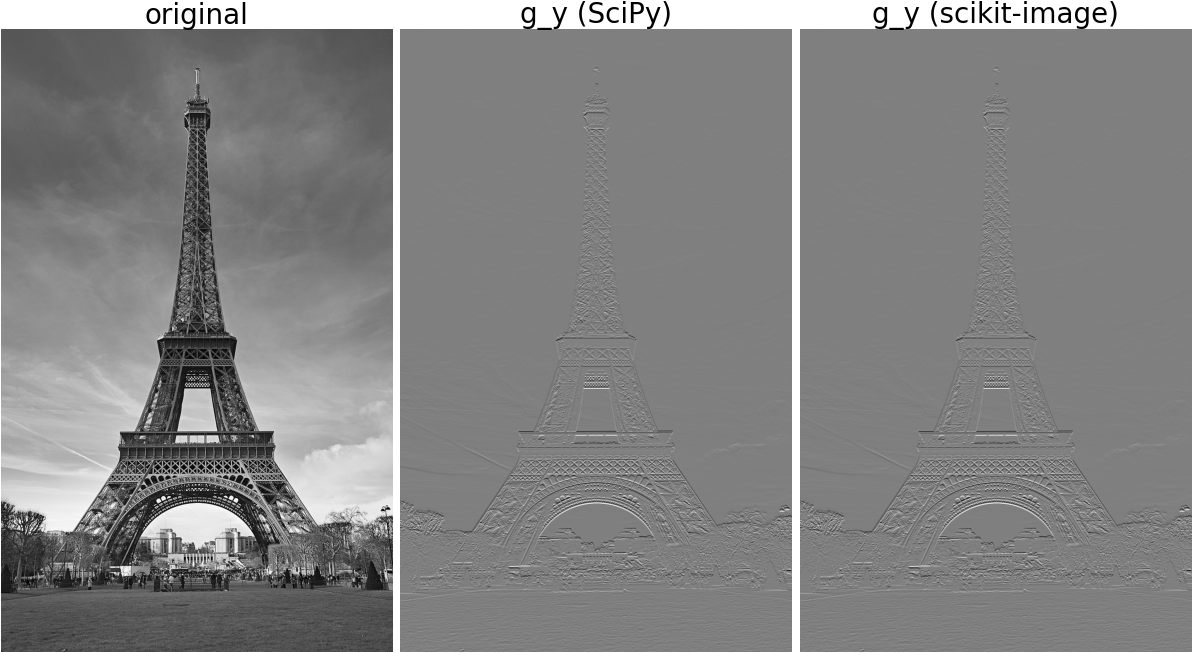

In [20]:
from scipy.ndimage import correlate
from skimage.filters import sobel_h

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Define the Sobel kernel for vertical edges
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# "Convolve" the image with the Sobel kernel to calculate horizontal gradients (partial derivative with respect to y)
gy_scipy = correlate(gray_image.astype(float), kernel_y)

# scikit-imate
gy_skimage = sobel_h(gray_image) # uses convolution and rotated kernel

# # Display the original and filtered images using show_collection
show_collection(
    [gray_image, gy_scipy, gy_skimage],
    titles=["original", "g_y (SciPy)", "g_y (scikit-image)"],
    cmap="gray", scale=0.05, fontsize=20
)

Now, we have the gradient magnitude after applying Roberts, Prewitt, and Sobel operators.

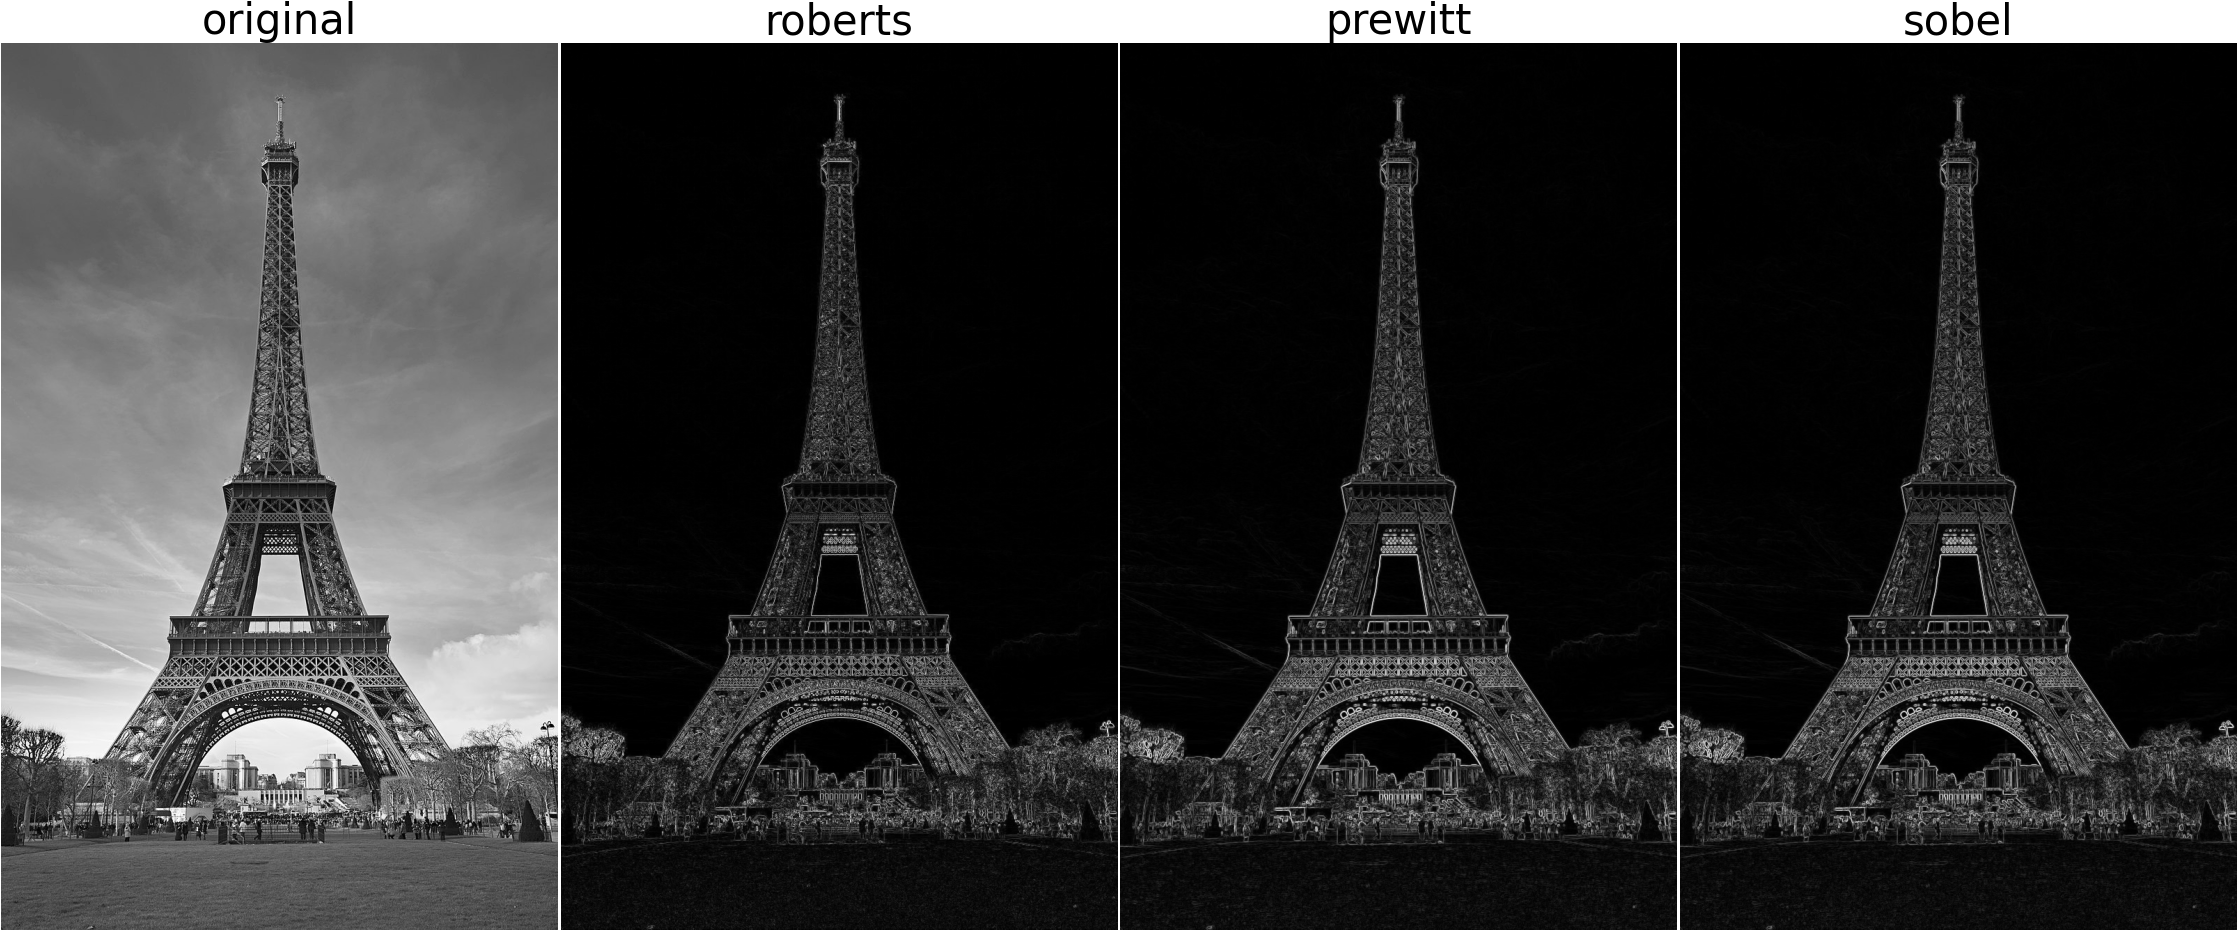

In [22]:
from skimage.filters import roberts, prewitt, sobel

# Apply Roberts, Prewitt, and Sobel operators
roberts_operator = roberts(gray_image)  # Apply the Roberts operator to the grayscale image
prewitt_operator = prewitt(gray_image)  # Apply the Prewitt operator to the grayscale image
sobel_operator = sobel(gray_image)      # Apply the Sobel operator to the grayscale image

# Display the original and filtered images using show_collection
show_collection(
    [gray_image, roberts_operator, prewitt_operator, sobel_operator],
    titles=["original", "roberts", "prewitt", "sobel"],
    cmap="gray", scale=0.07, fontsize=30
)
